In [1]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 6*

## Elementos armazenadores de energia

Comparação entre capacitores convencionais, supercapacitores e baterias de lítio. A tabela abaixo mostra as especificações  necessários para cada dispositivo armazenar ∼1 megajoule (MJ) de energia (300 watts-hora). 1 MJ de energia irá alimentar um laptop com um consumo médio de 50 W por 6 horas. Observe na primeira coluna que uma bateria de íon de lítio pode conter 1000 vezes mais energia do que um capacitor convencional.

$$
\begin{array}{|c|c|c|c|c|c|}
\hline \text { Dispositivo } & \begin{array}{c}
\text { Energia } \\
\text { específica } \\
\text { [Wh/kg]} \\
\end{array} & \begin{array}{c}
\text { Energia } \\
\text { específica } \\
\text { [MJ/kg] }
\end{array} & \begin{array}{c}
\text { Densidade de} \\
\text { Energia } \\
\text { [MJ / L] }
\end{array} & \begin{array}{c}
\text { Volume } \\
\text { requerido para } \\
\text { armazenar 1 MJ } \\
\text { [L] }
\end{array} & \begin{array}{c}
\text { Peso } \\
\text { requerido para } \\
\text { armazenar 1 MJ } \\
\text { [kg] }
\end{array} \\
\hline \begin{array}{c}
\text { Capacitor convencional} \\
\end{array} & 0.01-0.1 & 4 \times 10^{-5}-4 \times 10^{-4} & 6 \times 10^{-5}-6 \times 10^{-4} & 17000-1700 & 25000-2500 \\
\text { Supercapacitor } & 1-10 & 0.004-0.04 & 0.006-0.06 & 166-16 & 250-25 \\
\text { Bateria de Íons de Lítio } & 100-250 & 0.36-0.9 & 1-2 & 1-0.5 & 2.8-1.1 \\
\hline
\end{array}
$$

Fonte: Fawwaz Ulaby, Michel M. Maharbiz and Cynthia M. Furse, $\textit{ Circuit Analysis and Design}$, Michigan Publishing Services, 2018


## Resumo dos elementos passivos ideais de dois terminais

$$
\begin{array}{|l|c|c|c|}
\hline \text { Propriedade } & R & L & C \\
\hline \text { Relação } i-v  & i=\frac{v}{R} & i=\frac{1}{L} \int_{t_{0}}^{t} v(\tau) d \tau+i\left(t_{0}\right) & i=C \frac{d v}{d t} \\
\text { Relação } v-i & v=Ri & v=L \frac{d i}{d t} & v=\frac{1}{C} \int_{t_{0}}^{t} i(\tau) d \tau+v\left(t_{0}\right) \\
p \text { (potência }) & p=Ri^{2} & p=L i \frac{d i}{d t} & p=C v \frac{d v}{d t} \\
w \text { (energia armazenada) } & 0 & w=\frac{1}{2} L i^{2} & w=\frac{1}{2} C v^{2} \\
\text { Associação em série } & R_{\mathrm{eq}}=R_{1}+R_{2} & L_{\mathrm{eq}}=L_{1}+L_{2} & \frac{1}{C_{\mathrm{eq}}}=\frac{1}{C_{1}}+\frac{1}{C_{2}} \\
\text { Associação em paralelo } & \frac{1}{R_{\mathrm{eq}}}=\frac{1}{R_{1}}+\frac{1}{R_{2}} & \frac{1}{L_{\mathrm{eq}}}=\frac{1}{R_{1}}+\frac{1}{R_{2}} & C_{\mathrm{eq}}=C_{1}+C_{2} \\
\text { Comportamento em regime estacionário } & \text { sem mudanças } & \text { curto-circuito } & \text { circuito aberto } \\
\text { Pode } v \text { variar instantaneamente? } & \text { sim } & \text { sim } & \text { não } \\
\text { Pode } i \text { variar instantaneamente? } & \text { sim } & \text { não } & \text { sim }\\ \hline
\end{array}
$$

### Problema 1
  
Para o circuito abaixo, determine $v_{C1}$, $v_{C2}$ e $i_{L}$ assumindo que o circuito encontra-se em regime estacionário.


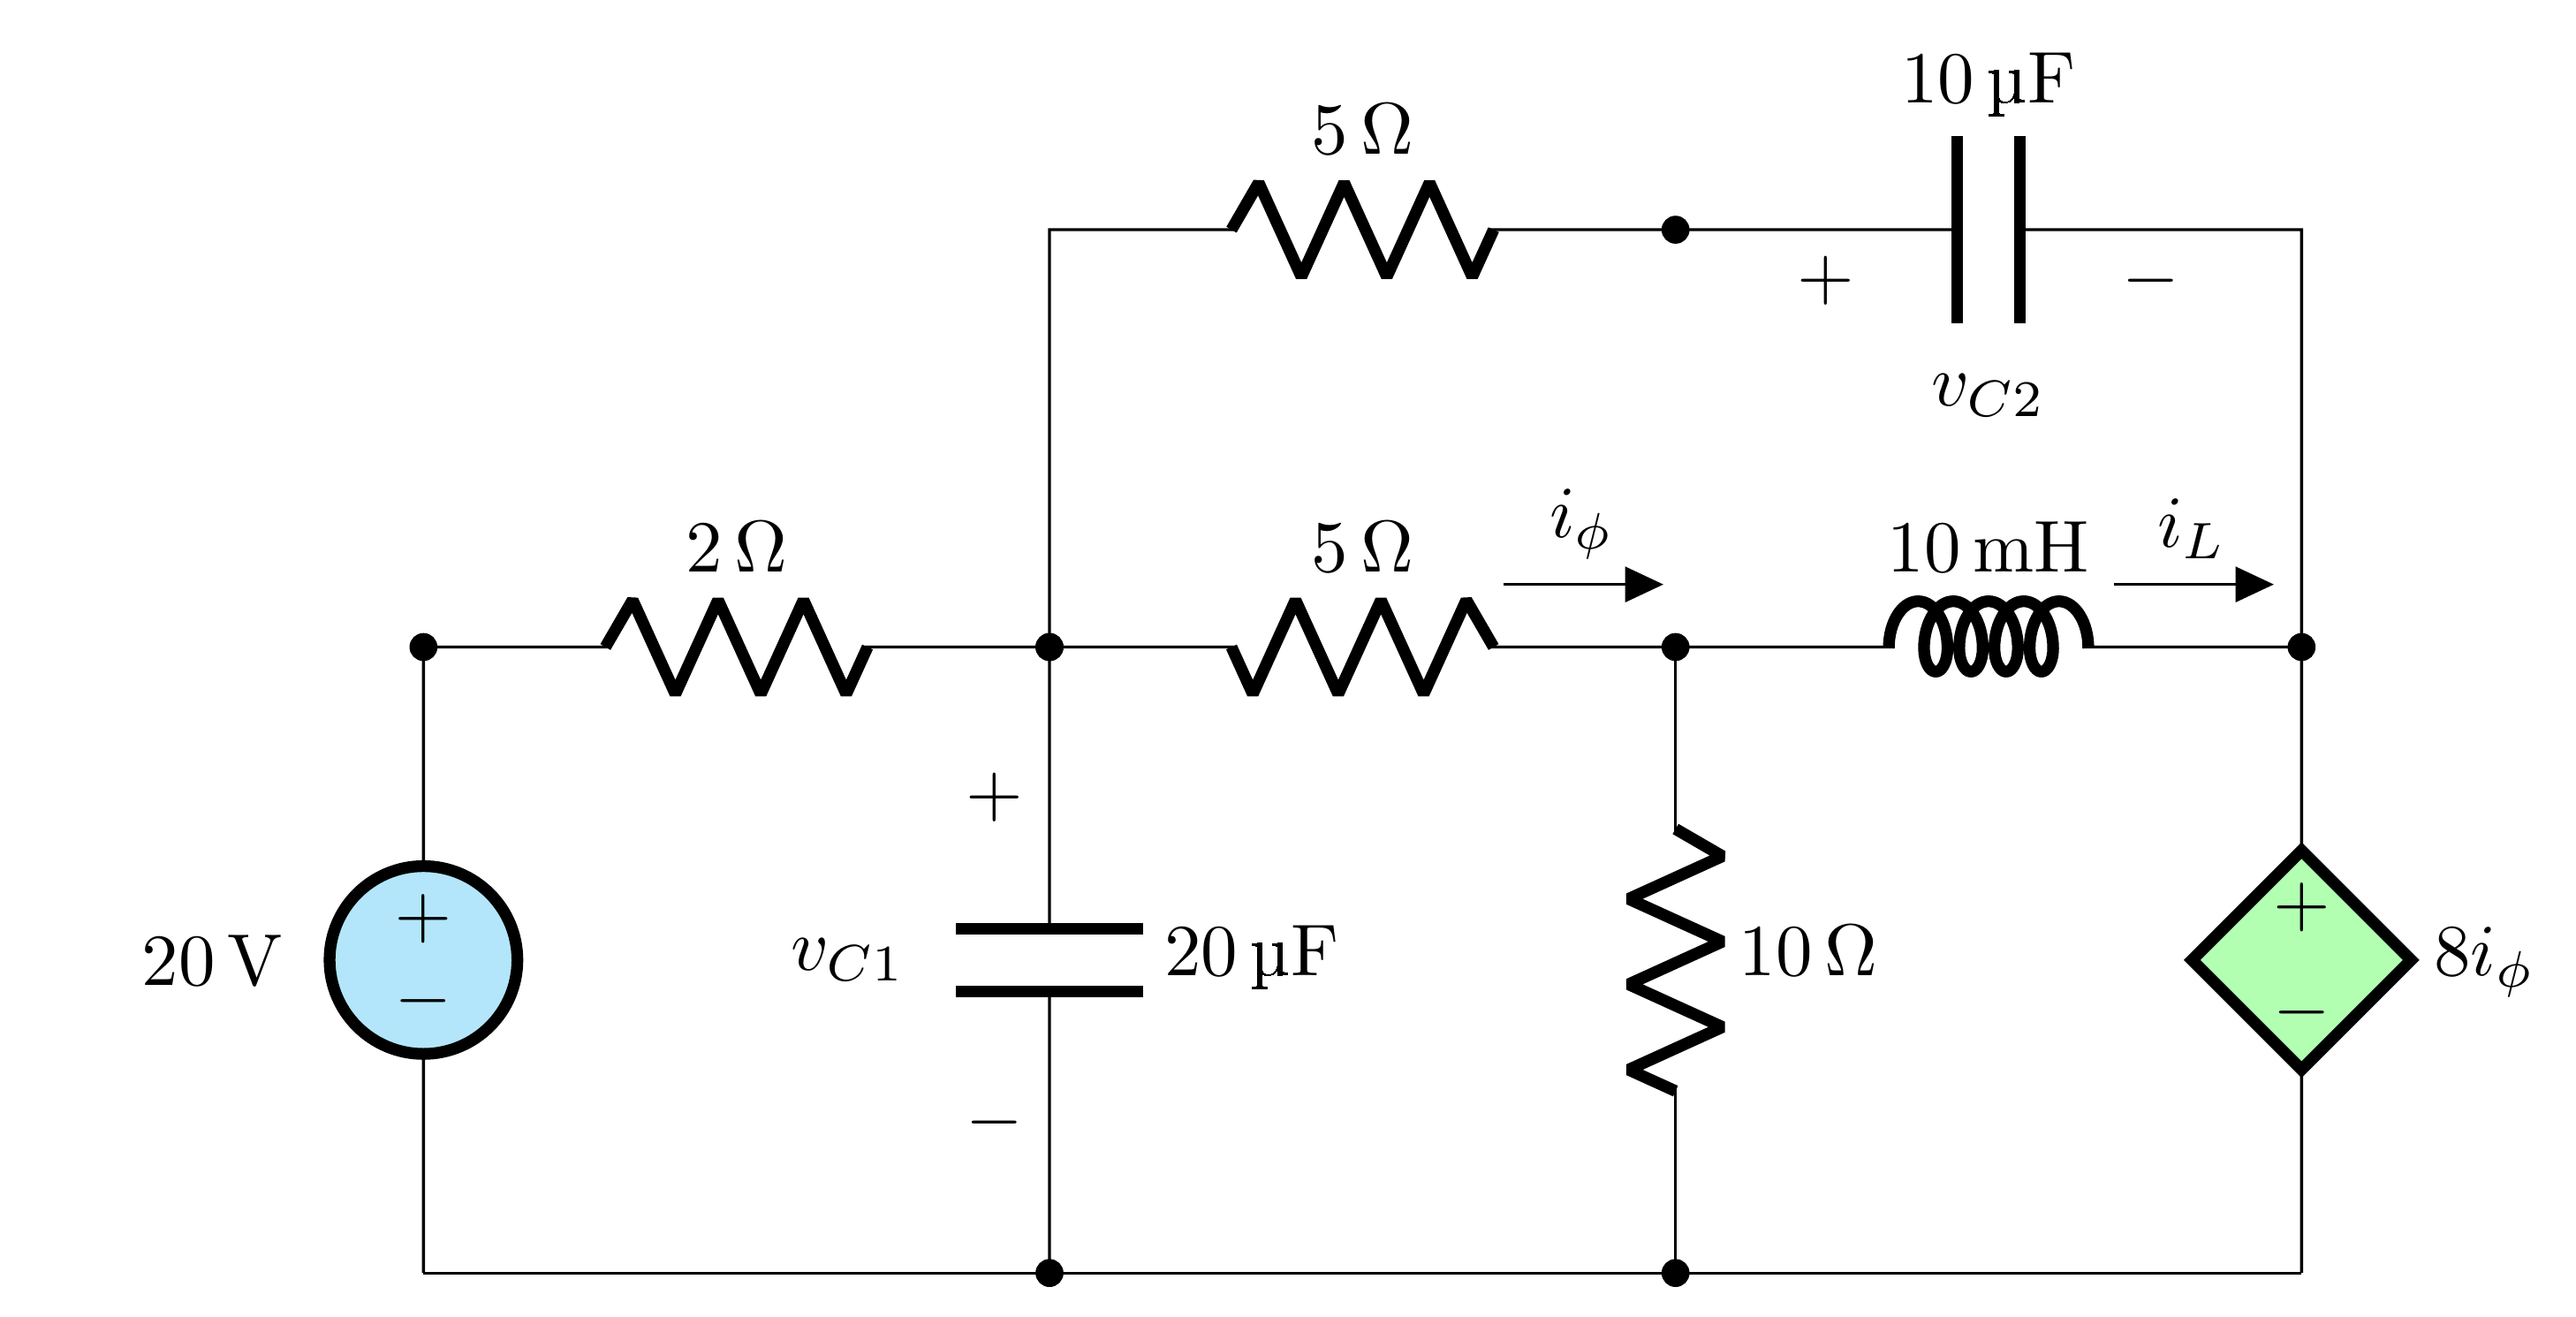

In [2]:
Image("./figures/J9C1.png", width=600)

### Problema 2
  
No circuito abaixo, sabe-se que $i_0(t)= 50e^{-8000t}[\cos(6000t)+2\mathrm{sen}(6000t)]$ mA, para $t\geq 0^+$. Determine $v_{C}(0^+)$, $v_{L}(0^+)$ e $v_{R}(0^+)$.


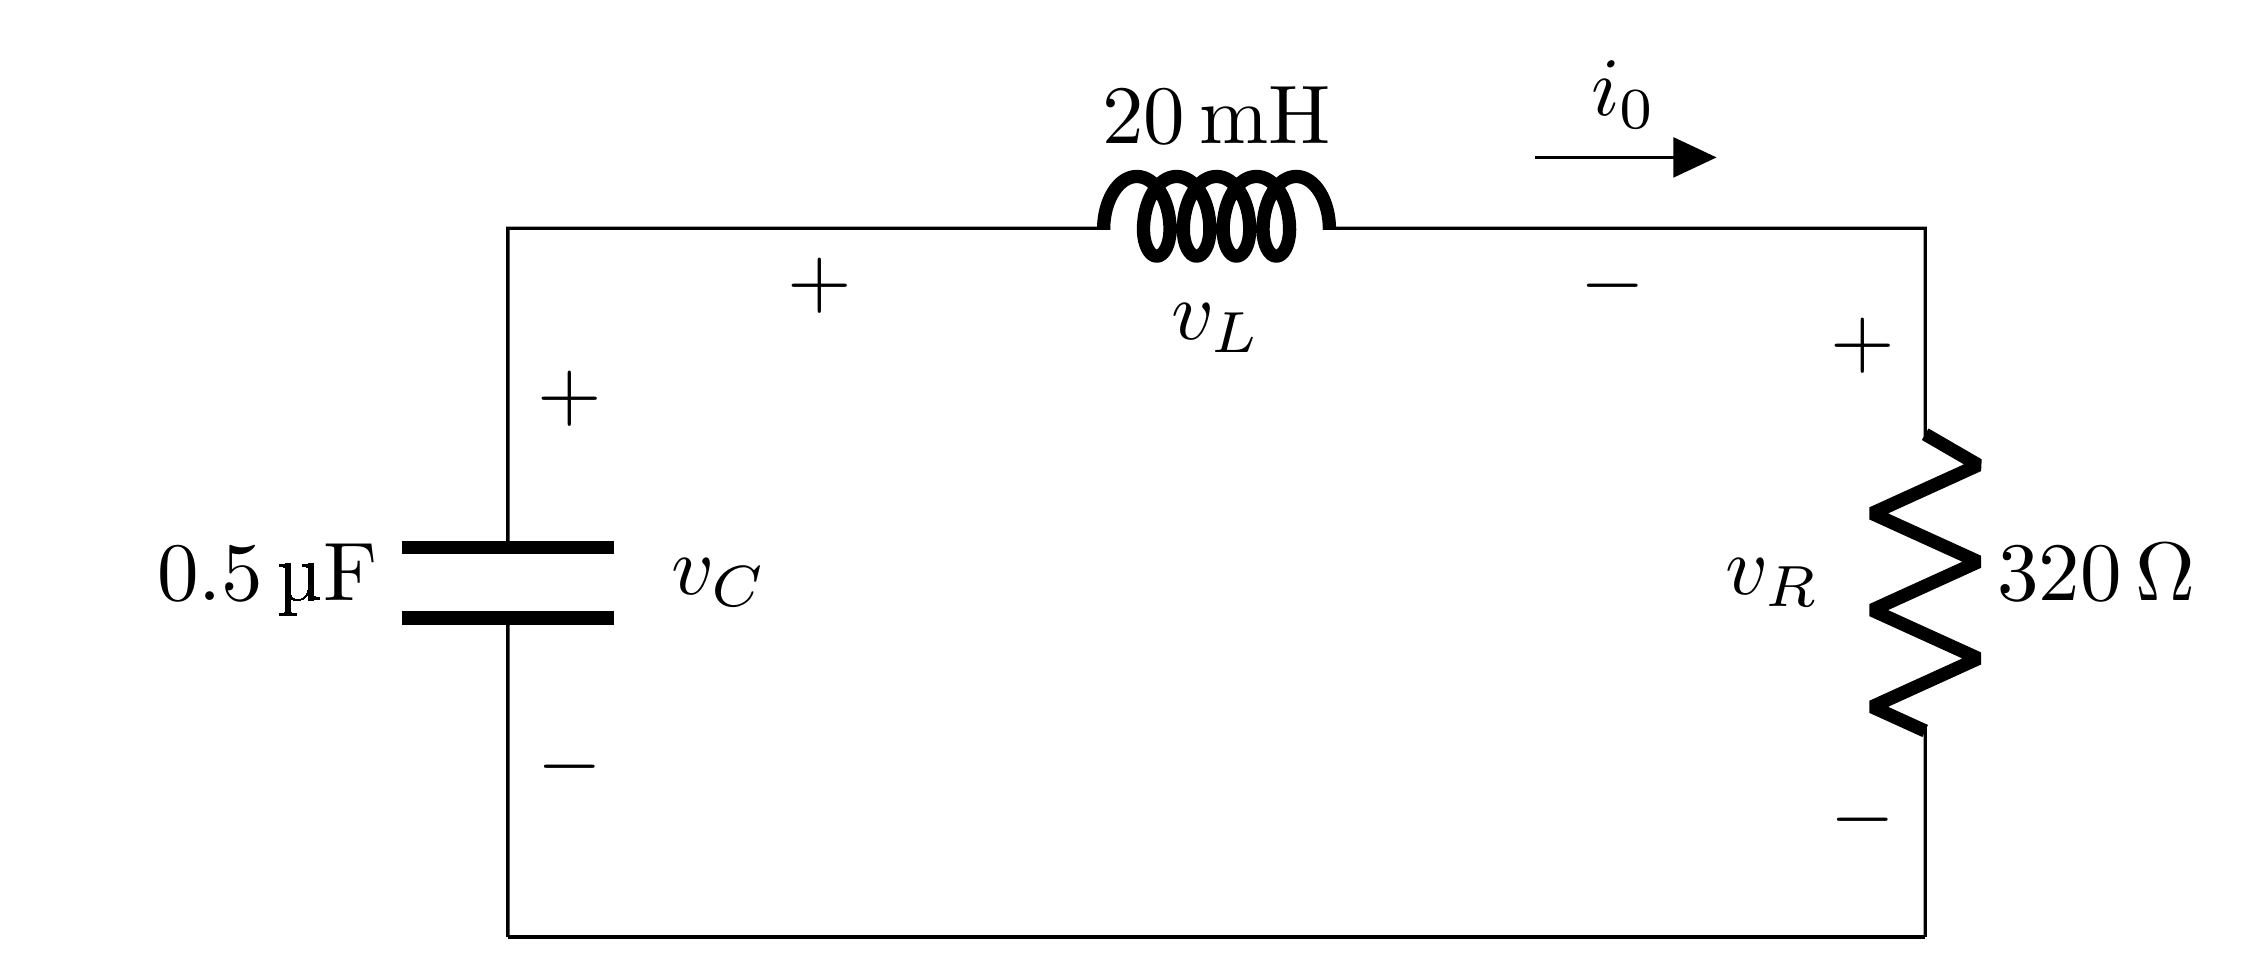

In [3]:
Image("./figures/J9C2.png", width=600)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

tmax = 1e-3
t    = np.linspace(0, tmax, num = 1000)
i0   = 50*np.exp(-8000*t)*(np.cos(6000*t)+2*np.sin(6000*t))*1e-3

plt.plot(t, i0)
plt.xlim(0, tmax)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('i0(t) [A]')
plt.show()

In [ ]:
# valores
R = 320
L = 20e-3
C = 0.5e-6

In [ ]:
# define variáveis 
t, τ = symbols('t, τ')

# define i0(t)
i0 = 50*exp(-8000*t)*(cos(6000*t)+2*sin(6000*t))*1e-3
i0

In [ ]:
# calcula tensão no indutor
vL = L*diff(i0, t)
vL = simplify(vL)

print('Tensão no indutor:')
print('vL(t) = ', vL , ' V')

In [ ]:
print('vL(0+) = %.2f V' %vL.evalf(subs={t:0}))

In [ ]:
# calcula tensão no resistor
vR = R*i0
#vR = simplify(vR)

print('Tensão no resistor:')
print('vR(t) = ', vR , ' V')

In [ ]:
print('vR(0+) = %.2f V' %vR.evalf(subs={t:0}))

In [ ]:
# calcula tensão no capacitor (LKT)
vC = vR + vL
vC = simplify(vC)

print('Tensão no capacitor:')
print('vC(t) = ', vC , ' V')

In [ ]:
print('vC(0+) = %.2f V' %vC.evalf(subs={t:0}))

In [ ]:
# checagem de vC(t) via integração de i0

i0 = 50*exp(-8000*τ)*(cos(6000*τ)+2*sin(6000*τ))*1e-3

vC = -(1/C)*integrate(i0, (τ, 0, t)) + 20
vC = simplify(vC)

print('vC(t) = ', vC , ' V')

In [ ]:
p = plot(vC, vR, vL, (t,0,6e-4), ylim = (-20,20), show=False, legend=True)
p[0].line_color = 'red'
p[1].line_color = 'blue'
p[2].line_color = 'black'
p[0].label = 'vC'
p[1].label = 'vR'
p[2].label = 'vL'
p.show()